In [1]:
# !pip install mysql-connector-python

In [2]:
# import basic libraries
import numpy as np
import pandas as pd

In [3]:
# import mysql conntctor
import mysql.connector

In [4]:
# connect the DB
try:
    conn = mysql.connector.connect(
        host = "localhost",
        user = "root",
        password = "smithost@127",
        db = "vehdb",
        port = int(3306),
        charset = 'utf8mb4'
    )

except e:
    print (e)
if conn:
    print ("Successfully Connected")
else:
    print ("Error connecting to DB")


Successfully Connected


In [5]:
# importing warnings library to ignore unexpected warnings
import warnings
warnings.filterwarnings("ignore")
# to hide the warning for SQLAlchemy

In [6]:
# import required libraries to generate visual metrices
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# set font size
sns.set(font_scale=1.2)

In [8]:
df_customer = pd.read_sql_query("SELECT * FROM customer_t", conn)
df_customer.head()

,customer_id,customer_name,gender,job_title,phone_number,email_address,city,country,state,customer_address,postal_code,credit_card_type,credit_card_number
0,0002-4115,Rafaela Hummerston,Female,Research Associate,862-362-4311,rhummerstoncg@unblog.fr,Newark,United States,New Jersey,556 Gerald Lane,7195,diners-club-enroute,4980000000000000
1,0002-4465,Minerva Noir,Female,Safety Technician II,317-472-9307,mnoirfc@mlb.com,Indianapolis,United States,Indiana,8958 Glacier Hill Crossing,46221,jcb,1300000000000000
2,0002-7597,Foss Ratcliffe,Male,Chief Design Engineer,360-923-0728,fratcliffed3@blog.com,Olympia,United States,Washington,4941 Tomscot Drive,98506,visa,4270000000000000
3,0006-0740,Tirrell Hegg,Male,Account Executive,916-275-2214,theggr6@stumbleupon.com,Sacramento,United States,California,542 Spenser Hill,95823,maestro,4290000000000000
4,0006-0951,Felike Penvarne,Male,Media Manager II,202-786-2819,fpenvarne81@nydailynews.com,Washington,United States,District of Columbia,93 Katie Junction,20057,jcb,1840000000000000


In [9]:
df_order = pd.read_sql_query("SELECT * FROM order_t", conn)
df_order.head()

,order_id,customer_id,shipper_id,product_id,quantity,vehicle_price,order_date,ship_date,discount,ship_mode,shipping,customer_feedback,quarter_number
0,0002-7502,0409-7139,3804,4680,1,72762.15,2018-11-27,2019-01-01,0.67,Standard Class,Truck,Very Bad,4
1,0004-0259,11673-067,3712,4925,1,78679.57,2018-10-28,2019-02-06,0.52,Same Day,Truck,Bad,4
2,0006-0078,65044-9961,3284,4361,2,94338.83,2018-03-26,2018-05-30,0.45,First Class,Air,Very Bad,1
3,0013-2651,36987-3061,1718,4214,2,73071.88,2018-10-31,2019-05-06,0.58,First Class,Air,Okay,4
4,0019-0862,68151-1471,2849,3603,2,85151.49,2018-11-10,2019-05-05,0.73,Standard Class,Air,Okay,4


In [10]:
df_product = pd.read_sql_query("SELECT * FROM product_t", conn)
df_product.head()

,product_id,vehicle_maker,vehicle_model,vehicle_color,vehicle_model_year,vehicle_price
0,3500,Kia,Rio,Pink,2006,85650.88623
1,3501,Volkswagen,GTI,Blue,2011,80690.46000
2,3503,Maserati,430,Blue,1990,73400.60700
3,3508,Jaguar,S-Type,Violet,2006,94846.19000
4,3509,GMC,2500 Club Coupe,Puce,1993,83682.33300


In [11]:
df_shipper = pd.read_sql_query("SELECT * FROM shipper_t", conn)
df_shipper.head()

,shipper_id,shipper_name,shipper_contact_details
0,1003,Tavu,187-20-9550
1,1005,Rhybox,655-21-6931
2,1007,Katz,815-87-7868
3,1009,Brainlounge,571-38-4231
4,1013,Realbridge,457-27-6078


### [Q1] What is the distribution of customers across states?

In [12]:
qry_q1 = """SELECT state, COUNT(customer_id) AS no_of_customers 
FROM customer_t 
GROUP BY state 
ORDER BY no_of_customers DESC;"""
df_q1 = pd.read_sql_query(qry_q1, conn)
df_q1.head()

,state,no_of_customers
0,California,97
1,Texas,97
2,Florida,86
3,New York,69
4,District of Columbia,35


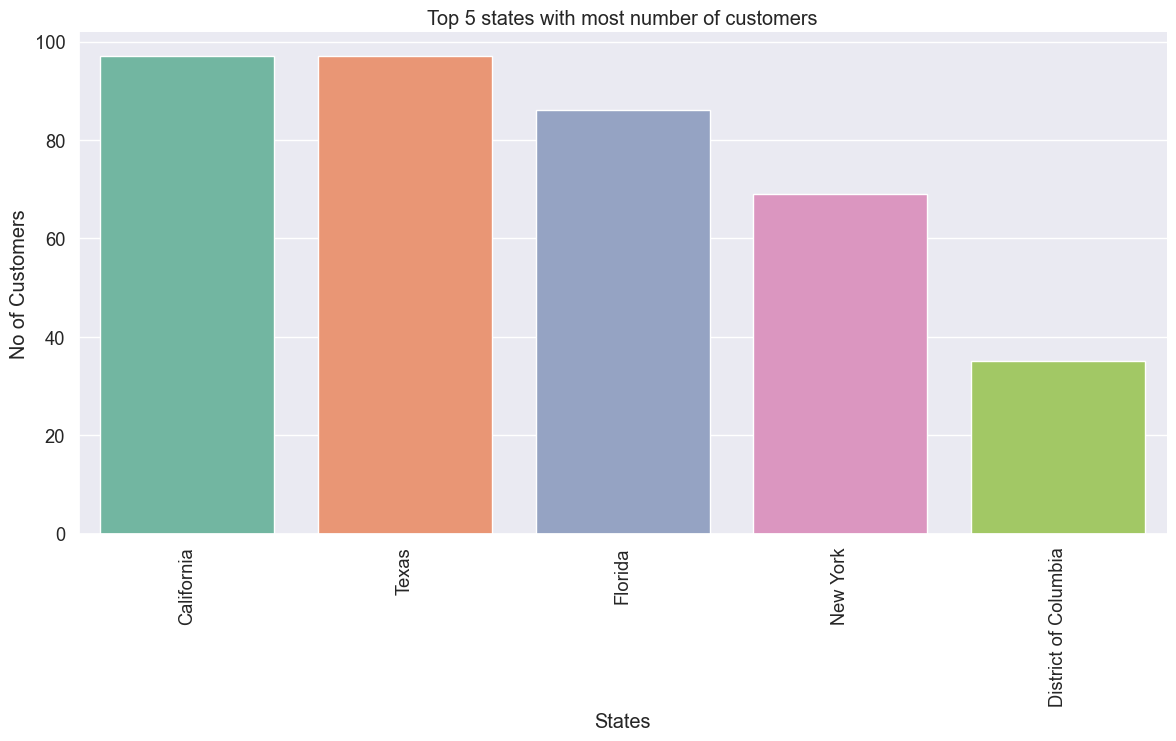

In [13]:
sns.catplot(data = df_q1.head(), x = 'state', y = 'no_of_customers', kind = 'bar', palette='Set2', height=6, aspect=10/5);
# sns.catplot(data = df_q1.head(), x = 'state', y = 'no_of_customers', kind = 'bar');
plt.title('Top 5 states with most number of customers')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('No of Customers')
plt.show();

### [Q2] What is the average rating in each quarter?

In [14]:
qry_q2 = """WITH CTE_customer_rating 
AS (
    SELECT quarter_number, customer_feedback,
        CASE
            WHEN customer_feedback = 'Very Bad' THEN 1
            WHEN customer_feedback = 'Bad' THEN 2
            WHEN customer_feedback = 'Okay' THEN 3
            WHEN customer_feedback = 'Good' THEN 4
            WHEN customer_feedback = 'Very Good' THEN 5
            ELSE customer_feedback
        END AS customer_rating
    FROM order_t
)
SELECT quarter_number, AVG(customer_rating) AS average_rating 
FROM CTE_customer_rating
GROUP BY quarter_number
ORDER BY quarter_number;"""
df_q2 = pd.read_sql_query(qry_q2, conn)
df_q2

,quarter_number,average_rating
0,1,3.554839
1,2,3.354962
2,3,2.956332
3,4,2.396985


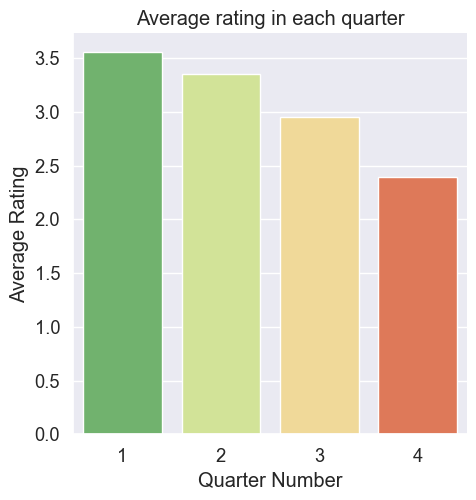

In [15]:
sns.catplot(data = df_q2, x = 'quarter_number', y = 'average_rating', kind = 'bar', palette='RdYlGn_r')
plt.title('Average rating in each quarter')
plt.xlabel('Quarter Number')
plt.ylabel('Average Rating')
plt.show();

### [Q3] Are customers getting more dissatisfied over time?

In [16]:
qry_q3 = """WITH CTE_customer_feedback_cnt
AS (
    SELECT quarter_number, COUNT(customer_feedback) AS total_feedback
    FROM order_t
    GROUP BY quarter_number
), 
CTE_quarterly_feedback_cnt
AS (
    SELECT customer_feedback, quarter_number, COUNT(customer_feedback) AS feedback_count
    FROM order_t
    GROUP BY quarter_number, customer_feedback
)
SELECT customer_feedback, cf.quarter_number, (feedback_count / total_feedback) * 100 AS feedback_percentage
FROM CTE_customer_feedback_cnt cf 
INNER JOIN CTE_quarterly_feedback_cnt qf ON cf.quarter_number = qf.quarter_number 
ORDER BY cf.quarter_number, FIELD(customer_feedback, 'Very Bad', 'Bad', 'Okay', 'Good', 'Very Good');"""
df_q3 = pd.read_sql_query(qry_q3, conn)
df_q3.head()

,customer_feedback,quarter_number,feedback_percentage
0,Very Bad,1,10.9677
1,Bad,1,11.2903
2,Okay,1,19.0323
3,Good,1,28.7097
4,Very Good,1,30.0000


In [17]:
df_q3.sort_values('quarter_number')

,customer_feedback,quarter_number,feedback_percentage
0,Very Bad,1,10.9677
1,Bad,1,11.2903
2,Okay,1,19.0323
3,Good,1,28.7097
4,Very Good,1,30.0000
8,Good,2,22.1374
7,Okay,2,20.2290
9,Very Good,2,28.6260
5,Very Bad,2,14.8855
6,Bad,2,14.1221


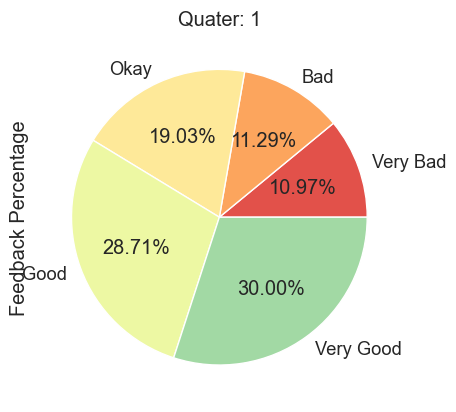

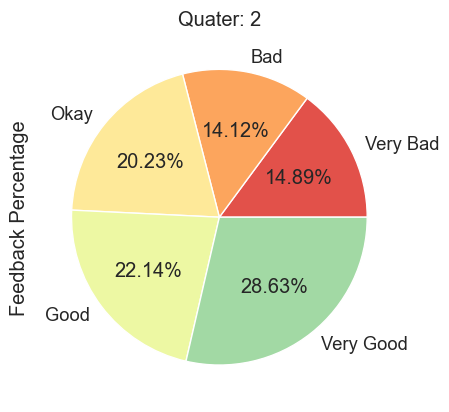

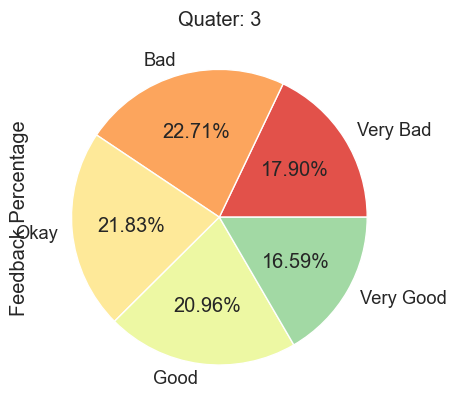

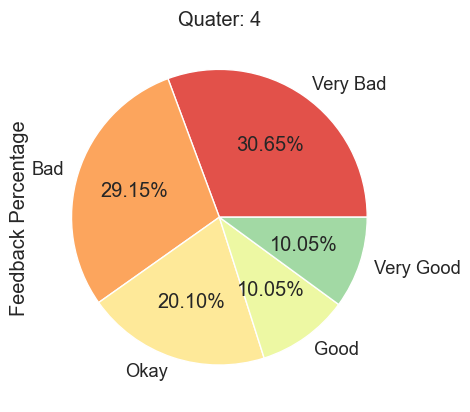

In [18]:
# sns.catplot(data = df_q3, x = 'quarter_number', y = 'feedback_percentage', hue = 'customer_feedback', kind = 'bar', palette='Spectral');
for quarter in df_q3['quarter_number'].unique():
    df_q3[df_q3['quarter_number'] == quarter].plot.pie(
        y = 'feedback_percentage', 
        labels = df_q3[df_q3['quarter_number'] == quarter]['customer_feedback'], 
        colors = sns.color_palette('Spectral'), 
        autopct = '%.2f%%', 
        legend = False
    )
    plt.ylabel('Feedback Percentage')
    plt.title('Quater: ' + str(quarter))
    plt.show()

### [Q4] Which are the top 5 vehicle makers preferred by the customer?

In [19]:
qry_q4 = """SELECT P.vehicle_maker, COUNT(O.customer_id) AS no_of_customers 
FROM order_t O
INNER JOIN product_t P ON O.product_id = P.product_id
GROUP BY P.vehicle_maker
ORDER BY COUNT(O.customer_id) DESC
LIMIT 5;"""
df_q4 = pd.read_sql_query(qry_q4, conn)
df_q4

,vehicle_maker,no_of_customers
0,Chevrolet,83
1,Ford,63
2,Toyota,52
3,Pontiac,50
4,Dodge,50


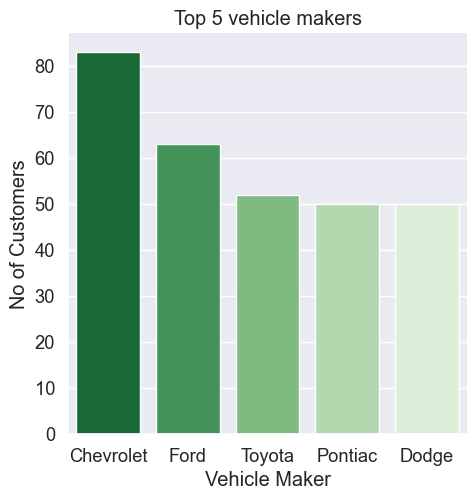

In [20]:
sns.catplot(data = df_q4, x = 'vehicle_maker', y = 'no_of_customers', kind = 'bar', palette='Greens_r')
plt.title('Top 5 vehicle makers')
plt.xlabel('Vehicle Maker')
plt.ylabel('No of Customers')
plt.show();

### [Q5] What is the most preferred vehicle make in each state?

In [21]:
qry_q5 = """WITH CTE_preferred_vehicle_maker
AS (
    SELECT P.vehicle_maker, C.state, COUNT(O.customer_id) AS no_of_customer, 
        RANK() OVER (
            PARTITION BY C.state ORDER BY COUNT(O.customer_id) DESC
        ) AS preferred_rank
    FROM order_t O
    INNER JOIN product_t P ON O.product_id = P.product_id
    INNER JOIN customer_t C ON O.customer_id = C.customer_id
    GROUP BY 1, 2
)
SELECT state, vehicle_maker 
FROM CTE_preferred_vehicle_maker
WHERE preferred_rank = 1
ORDER BY 1, 2;"""
df_q5 = pd.read_sql_query(qry_q5, conn)
df_q5

,state,vehicle_maker
0,Alabama,Dodge
1,Alaska,Chevrolet
2,Arizona,Cadillac
3,Arizona,Pontiac
4,Arkansas,Chevrolet
...,...,...
138,Wisconsin,Honda
139,Wisconsin,Mazda
140,Wisconsin,Nissan
141,Wisconsin,Pontiac


In [22]:
# len(df_q5['vehicle_maker'].unique())
df_q5_vms = df_q5.groupby('vehicle_maker').count()
df_q5_vms.reset_index(inplace=True)
# print(df_q5_vms.head())
state_list = []
for vehicle_maker in df_q5_vms['vehicle_maker']:
    state_names = list(df_q5[df_q5['vehicle_maker'] == vehicle_maker]['state'])
    state_list.append(state_names)

# print(state_list)
df_q5_vms['state_names'] = state_list
# print(df_q5_vms[df_q5_vms['state'] >= 5])
df_q5_top_vehicle_maker_state = df_q5_vms[df_q5_vms['state'] >= 5]
df_q5_top_vehicle_maker_state.rename(columns={"vehicle_maker": "Vehicle Maker", "state_names": "State Names", 'state': 'State Count'}, inplace = True)
print(df_q5_top_vehicle_maker_state)
# df_q5_top_vehicle_maker_state.to_excel('df_q5_top_vehicle_maker_state.xlsx', index = False)

    Vehicle Maker  State Count  \
5       Chevrolet           17   
7           Dodge           12   
9            Ford           10   
10            GMC            5   
21          Mazda            8   
22  Mercedes-Benz            6   
25         Nissan            7   
27        Pontiac           11   
33         Toyota            9   

                                          State Names  
5   [Alaska, Arkansas, California, Colorado, Conne...  
7   [Alabama, California, Idaho, Iowa, Kansas, Mas...  
9   [California, Hawaii, Illinois, Iowa, Kansas, L...  
10    [Arkansas, Hawaii, Illinois, Kansas, Minnesota]  
21  [Indiana, Iowa, Kansas, Oklahoma, South Caroli...  
22  [Kansas, Kentucky, Maine, Nebraska, New Jersey...  
25  [California, Hawaii, Kansas, Kentucky, Louisia...  
27  [Arizona, Arkansas, Hawaii, Iowa, Kentucky, Lo...  
33  [Florida, Georgia, Hawaii, Mississippi, Nebras...  


### [Q6] What is the trend of number of orders by quarters?

In [23]:
qry_q6 = """SELECT quarter_number, COUNT(order_id) AS no_of_order
FROM order_t 
GROUP BY quarter_number
ORDER BY quarter_number ASC;"""
df_q6 = pd.read_sql_query(qry_q6, conn)
df_q6

,quarter_number,no_of_order
0,1,310
1,2,262
2,3,229
3,4,199


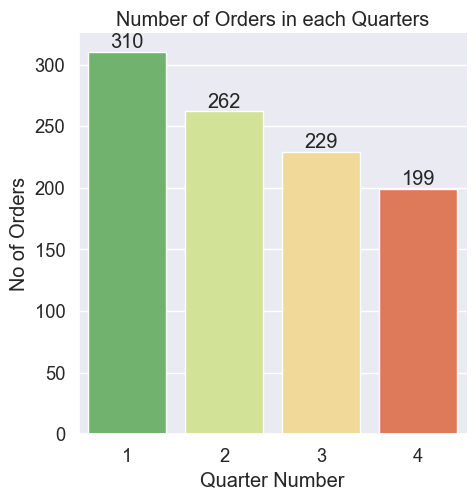

In [24]:
g = sns.catplot(data = df_q6, x = 'quarter_number', y = 'no_of_order', kind = 'bar', palette='RdYlGn_r')

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [int(v.get_height()) for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.title('Number of Orders in each Quarters')
plt.xlabel('Quarter Number')
plt.ylabel('No of Orders')
plt.show();

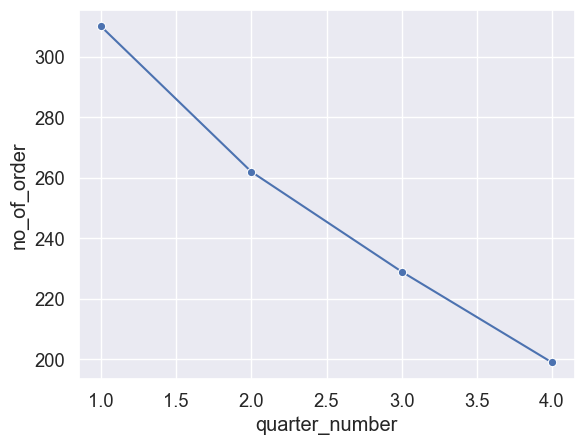

In [25]:
sns.lineplot(
    x = 'quarter_number',
    y = 'no_of_order',
    data = df_q6,
    marker='o'
);

### [Q7] What is the quarter over quarter % change in revenue?

In [26]:
qry_q7 = """WITH CTE_QoQ 
AS (
    SELECT quarter_number,
        SUM((vehicle_price - ((discount / 100) * vehicle_price))) AS total_revenue
    FROM order_t
    GROUP BY 1
)
SELECT quarter_number, total_revenue,
      LAG(total_revenue) OVER(ORDER BY quarter_number) AS previous_revenue,
      (total_revenue - LAG(total_revenue) OVER(ORDER BY quarter_number)) / LAG(total_revenue) OVER(ORDER BY quarter_number) AS qoq_perc_change
FROM CTE_QoQ;"""
df_q7 = pd.read_sql_query(qry_q7, conn)
df_q7.rename(columns={"quarter_number": "Quarter Number", "total_revenue": "Total Revenue", 'previous_revenue': 'Previous Revenue', 'qoq_perc_change': 'QoQ Change in %'}, inplace = True)
print(df_q7)
df_q7.to_excel('df_q7.xlsx', index = False)

   Quarter Number  Total Revenue  Previous Revenue  QoQ Change in %
0               1   2.637502e+07               NaN              NaN
1               2   2.146576e+07      2.637502e+07        -0.186133
2               3   1.958228e+07      2.146576e+07        -0.087743
3               4   1.518238e+07      1.958228e+07        -0.224688


In [27]:
# g = sns.lineplot(data = df_q7, x = 'quarter_number', y = 'total_revenue', marker = 'o')

# # extract the matplotlib axes_subplot objects from the FacetGrid
# ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# # iterate through the axes containers
# for c in ax.containers:
#     for x,y,m in item[1][['x','y','mark_value']].values:
#     ax.text(x,y,f'{m:.2f}')

In [28]:
# x = df_q7['quarter_number']
# y = df_q7['total_revenue']
 
# plt.figure(figsize=(8, 6))
# plt.plot(x, y, marker='o', linestyle='-')
 
# for i, (xi, yi) in enumerate(zip(x, y)):
#     plt.annotate(f'({xi}, {yi})', (xi, yi), textcoords="offset points", xytext=(5, 20), ha='center')
 
# plt.title('Line Chart with Annotations')
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
 
# plt.grid(True)
 
# plt.show()

### [Q8] What is the trend of revenue and orders by quarters?

In [29]:
qry_q8 = """SELECT quarter_number, 
    SUM((vehicle_price - ((discount / 100) * vehicle_price))) AS total_revenue, 
    COUNT(order_id) AS no_of_order 
FROM order_t 
GROUP BY quarter_number
ORDER BY quarter_number ASC;"""
df_q8 = pd.read_sql_query(qry_q8, conn)
df_q8

,quarter_number,total_revenue,no_of_order
0,1,2.637502e+07,310
1,2,2.146576e+07,262
2,3,1.958228e+07,229
3,4,1.518238e+07,199


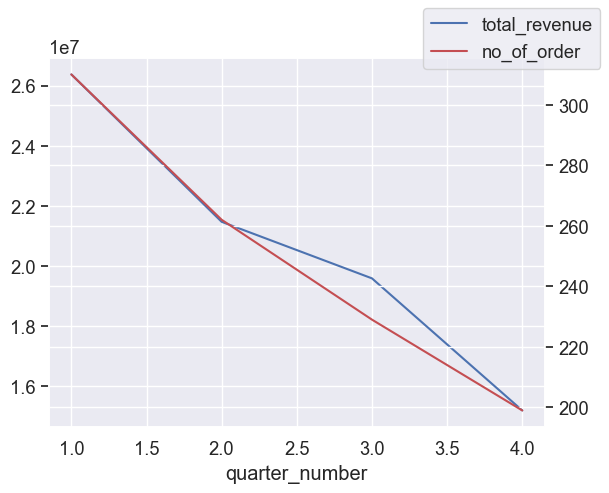

In [30]:
ax = df_q8.plot(x='quarter_number', y='total_revenue', legend=False)
ax2 = ax.twinx()
df_q8.plot(x='quarter_number', y='no_of_order', ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show();

### [Q9] What is the average discount offered for different types of credit cards?

In [31]:
qry_q9 = """SELECT C.credit_card_type, AVG(O.discount) AS average_discount
FROM order_t O
INNER JOIN customer_t C ON O.customer_id = C.customer_id
GROUP BY C.credit_card_type
ORDER BY AVG(O.discount) DESC;"""
df_q9 = pd.read_sql_query(qry_q9, conn)
df_q9.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
credit_card_type,laser,mastercard,maestro,visa-electron,china-unionpay,instapayment,americanexpress,diners-club-us-ca,diners-club-carte-blanche,switch,bankcard,jcb,visa,diners-club-enroute,solo,diners-club-international
average_discount,0.643846,0.6295,0.624219,0.623469,0.622174,0.620625,0.616327,0.614615,0.61449,0.610233,0.609545,0.607382,0.600833,0.599792,0.585,0.584


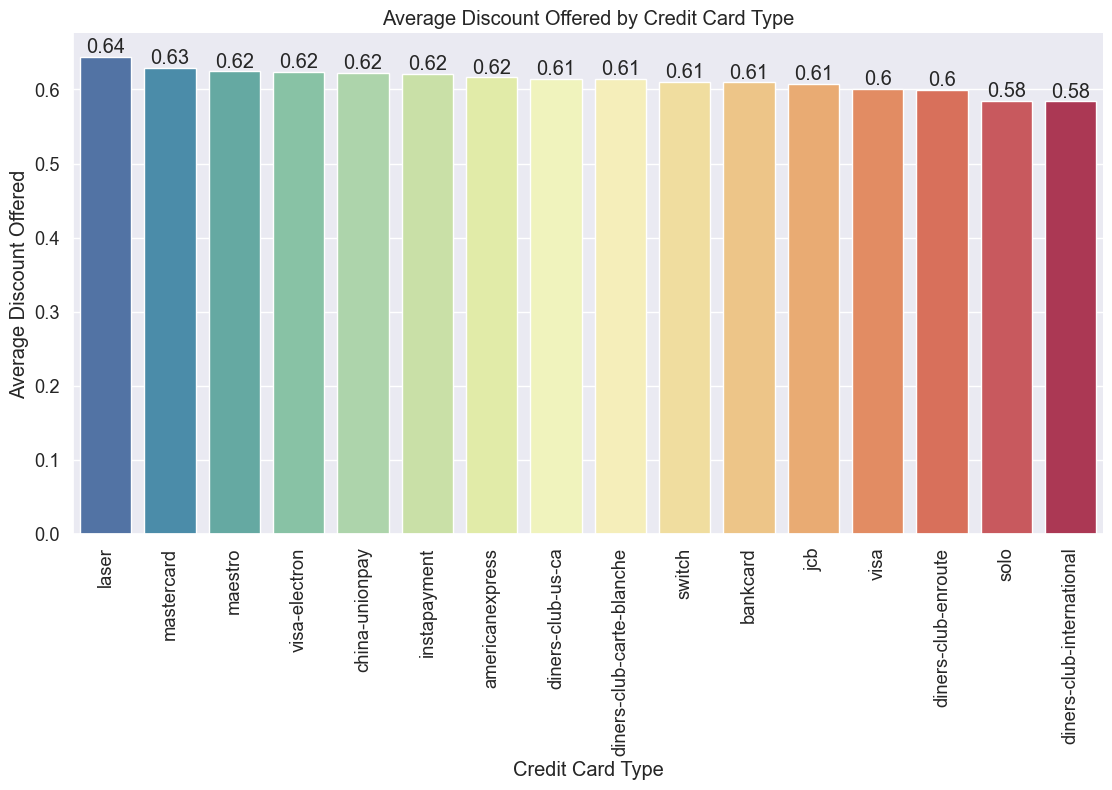

In [32]:
# sns.catplot(data = df_q9, x = 'credit_card_type', y = 'average_discount', kind = 'bar', palette='Set3', height=6, aspect=10/5);

g = sns.catplot(data = df_q9, x = 'credit_card_type', y = 'average_discount', kind = 'bar', palette='Spectral_r', height=6, aspect=10/5)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [round(v.get_height(), 2) for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.xticks(rotation=90)
plt.title('Average Discount Offered by Credit Card Type')
plt.xlabel('Credit Card Type')
plt.ylabel('Average Discount Offered')
plt.show();

### [Q10] What is the average time taken to ship the placed orders for each quarters?

In [33]:
qry_q10 = """SELECT quarter_number, 
ROUND(AVG(DATEDIFF(ship_date, order_date)), 2) AS average_shipping_time
FROM order_t
GROUP BY quarter_number
ORDER BY quarter_number;"""
df_q10 = pd.read_sql_query(qry_q10, conn)
df_q10

,quarter_number,average_shipping_time
0,1,57.17
1,2,71.11
2,3,117.76
3,4,174.10


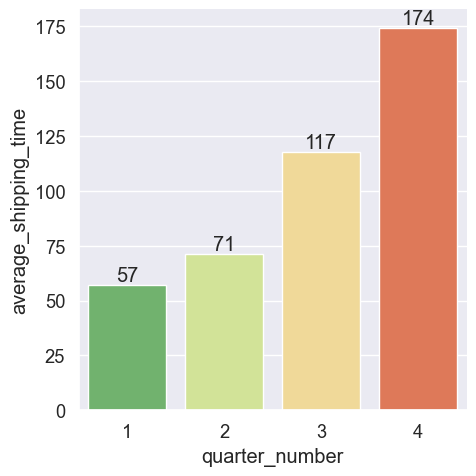

In [34]:
g = sns.catplot(data = df_q10, x = 'quarter_number', y = 'average_shipping_time', kind = 'bar', palette='RdYlGn_r')

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [int(v.get_height()) for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [35]:
qry_new_wheel = """SELECT 
    p.vehicle_model, p.vehicle_maker, p.vehicle_color, p.vehicle_model_year, 
    o.quantity, o.vehicle_price, o.discount, o.quarter_number, o.customer_feedback, 
    CASE
        WHEN o.customer_feedback = 'Very Bad' THEN 1
        WHEN o.customer_feedback = 'Bad' THEN 2
        WHEN o.customer_feedback = 'Okay' THEN 3
        WHEN o.customer_feedback = 'Good' THEN 4
        WHEN o.customer_feedback = 'Very Good' THEN 5
        ELSE o.customer_feedback
    END AS customer_rating, 
    c.customer_name, c.gender, c.job_title, c.city, c.country, c.state, c.postal_code, c.credit_card_type, 
    s.shipper_name, o.ship_mode, o.shipping, DATEDIFF(ship_date, order_date) AS shipping_time 
FROM order_t o
INNER JOIN customer_t c ON o.customer_id = c.customer_id
INNER JOIN product_t p ON o.product_id = p.product_id
INNER JOIN shipper_t s ON o.shipper_id = s.shipper_id;"""
df_new_wheel = pd.read_sql_query(qry_new_wheel, conn)
df_new_wheel

,vehicle_model,vehicle_maker,vehicle_color,vehicle_model_year,quantity,vehicle_price,discount,quarter_number,customer_feedback,customer_rating,...,job_title,city,country,state,postal_code,credit_card_type,shipper_name,ship_mode,shipping,shipping_time
0,Protege,Mazda,Crimson,1997,1,72762.15,0.67,4,Very Bad,1,...,Data Coordiator,Springfield,United States,Ohio,45505,jcb,Cogibox,Standard Class,Truck,35
1,Sierra 3500HD,GMC,Khaki,2006,1,78679.57,0.52,4,Bad,2,...,Chief Design Engineer,Jacksonville,United States,Florida,32209,visa-electron,Ntags,Same Day,Truck,101
2,Neon,Plymouth,Purple,1996,2,94338.83,0.45,1,Very Bad,1,...,Research Assistant IV,New York City,United States,New York,10060,switch,Leexo,First Class,Air,65
3,Aerostar,Ford,Red,1997,2,73071.88,0.58,4,Okay,3,...,Software Consultant,Silver Spring,United States,Maryland,20904,diners-club-carte-blanche,Meezzy,First Class,Air,187
4,Amigo,Isuzu,Indigo,1993,2,85151.49,0.73,4,Okay,3,...,Automation Specialist IV,Saint Louis,United States,Missouri,63150,laser,Quatz,Standard Class,Air,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Phantom,Rolls-Royce,Blue,2013,1,93910.22,0.69,2,Very Good,5,...,Engineer I,Oklahoma City,United States,Oklahoma,73197,jcb,Wikivu,First Class,Truck,35
996,Savana 3500,GMC,Blue,2007,2,79925.88,0.58,1,Very Bad,1,...,Staff Scientist,Richmond,United States,Virginia,23208,jcb,Jabbersphere,Standard Class,Truck,101
997,Grand Prix,Pontiac,Purple,1996,2,71216.43,0.55,1,Okay,3,...,Registered Nurse,Phoenix,United States,Arizona,85010,jcb,Camido,Second Class,Air,44
998,Endeavor,Mitsubishi,Orange,2009,1,84706.81,0.56,1,Okay,3,...,Operator,Little Rock,United States,Arkansas,72204,jcb,Omba,Same Day,Truck,70
